# 100_RQ1A 

# _ Question One: Is There a Safest Time for Travel?_

## _ (A): Is it Safer to Drive in the Summer than in the Winter? (1979-2016)_

## Purpose

We return to part (A) of our first research question in this notebook and finalise our analysis of whether and how seasons, weather and road surface conditions impact road safety.


### Notebook Contents:

* __1:__ Loading Datasets

* __2:__ Accidents per Season
     * __2.1:__ Accident Severity per Season

* __3:__  Weather Conditions per Season    
  

* __4:__ Road Surface Conditions per Season

* __5:__ Conclusion



## Datasets

* __Input__: 

* 100_analysis_Q1A_all_seasons_severity.pkl (All accident severity per season of UK Road Accidents from 1979 - 2016)


* 100_analysis_Q1A_norm_seasons_severity.pkl(Normalised accident severity per season of UK Road Accidents from 1979 - 2016)


* 100_analysis_Q1A_norm_seasons_weather.pkl (Normalised weather conditions per season of UK Road Accidents from 1979 - 2016)


* 100_analysis_Q1A_norm_seasons_road_cond.pkl (Normalised road conditions per season of UK Road Accidents from 1979 - 2016)


* __Output__: n/a

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

% matplotlib inline

C:\Users\Ciara\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Define Some Matplotlib Configuration

Below we have included some formatting which we want each of our plots to follow.

This template has been taken from Barry's Valencia Results Notebooks.

In [2]:
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_palette("muted")
sns.set_context("poster")

# Text, lines, and markers...
plt.rcParams['text.color'] = 'k'
plt.rcParams['axes.labelcolor'] = 'k'

plt.rcParams['axes.titlesize'] = 40
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['axes.labelweight'] = 'bold'

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

plt.rcParams['axes.grid'] = True

plt.rcParams['lines.markersize'] = 30
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 2

plt.rcParams['legend.fontsize'] = 20

## 1.
## Loading Datasets

Reading in our datasets using pd.read_pickle:

In [3]:
all_seasons_sev = pd.read_pickle('../../data/analysis/100_analysis_Q1A_all_seasons_severity.pkl')
all_seasons_sev.shape

(4, 3)

In [4]:
norm_seasons_sev = pd.read_pickle('../../data/analysis/100_analysis_Q1A_norm_seasons_severity.pkl')
norm_seasons_sev.shape

(4, 3)

In [5]:
norm_seasons_weather = pd.read_pickle('../../data/analysis/100_analysis_Q1A_norm_seasons_weather.pkl')
norm_seasons_weather.shape

(4, 8)

In [6]:
norm_seasons_road_cond = pd.read_pickle('../../data/analysis/100_analysis_Q1A_norm_seasons_road_cond.pkl')
norm_seasons_road_cond.shape

(4, 5)

## 2.
# Accidents per Season

The graph below shows the total percentage of recorded accidents from 1979 - 2016 in each season.

(-1.25, 1.25, -1.25, 1.25)

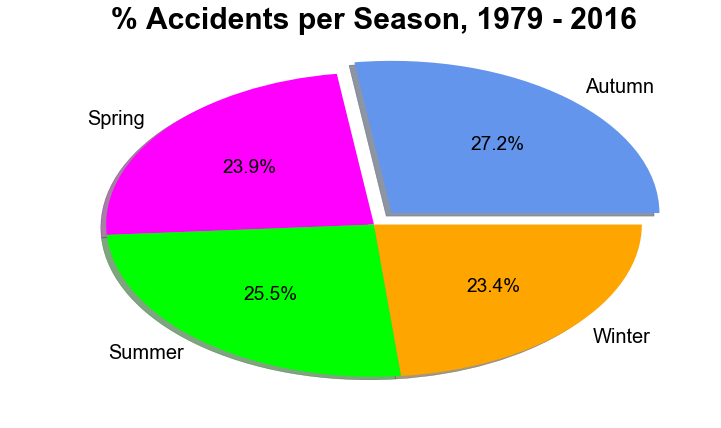

In [7]:
explode = (0.1, 0, 0, 0) #explode first section of pie chart
all_seasons_sev['Total'] = all_seasons_sev.sum(axis=1)
all_seasons_sev['Total'].plot(kind='pie', explode=explode, autopct='%1.1f%%', colors=['cornflowerblue','magenta','lime','orange'], shadow=True, figsize=(12,7))
plt.title('% Accidents per Season, 1979 - 2016', fontsize=30) #add title
plt.axis('off')

From thie graph, we can see the overall ranking of Seasons with the most accidents:

1. Autumn
2. Summer
3. Spring
4. Winter

We will not use this graph for our final conclusions as the percentage of accidents per season needs to be normalised, due to the possibility that there are simply more people using the roads in the Summer time due to nice weather. This is displayed below.

## 2.1
# Accident Severity by Season

The graphs below show the normalised % breakdown of accident severity in all recorded accidents from 1979 - 2016, grouped by season.

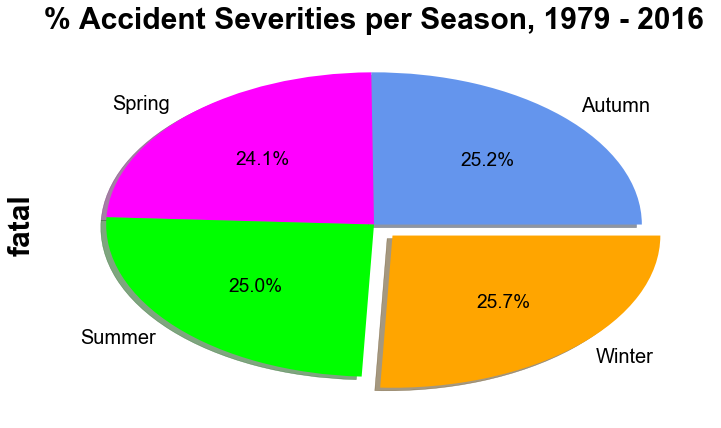

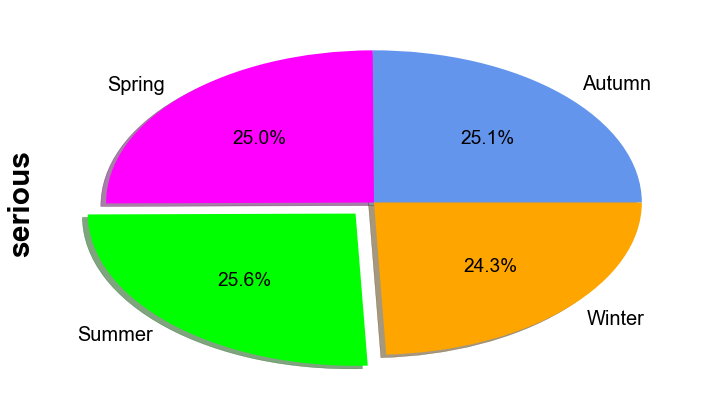

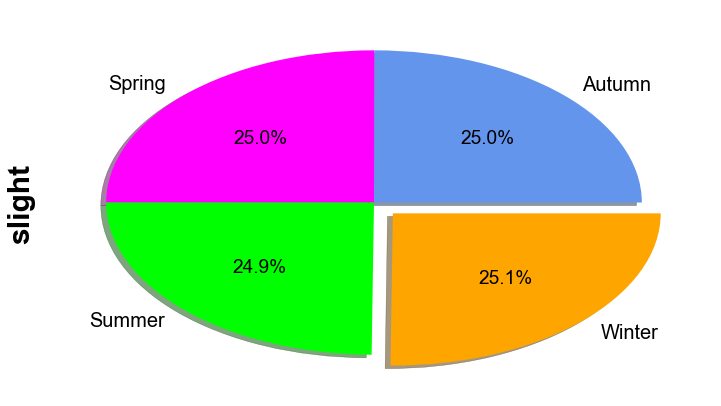

In [8]:
# plot all fatal accidents 
explode_fatal = (0, 0, 0, 0.1) #explode last section of pie chart
season_fatal = norm_seasons_sev['fatal'].plot(kind='pie', explode=explode_fatal,autopct='%1.1f%%', shadow=True, colors=['cornflowerblue','magenta','lime','orange'], figsize=(12,7))
plt.title('% Accident Severities per Season, 1979 - 2016', fontsize=30) #add title
plt.show()

# plot all serious accidents
explode_serious = (0, 0, 0.1, 0) #explode third section of pie chart
season_serious = norm_seasons_sev['serious'].plot(kind='pie', explode=explode_serious,autopct='%1.1f%%', shadow=True, colors=['cornflowerblue','magenta','lime','orange'], figsize=(12,7))
plt.show()

#plot all slight accidents
explode_slight = (0, 0, 0, 0.1) #explode last section of pie chart
season_slight = norm_seasons_sev['slight'].plot(kind='pie', explode=explode_slight, autopct='%1.1f%%', shadow=True, colors=['cornflowerblue','magenta','lime','orange'], figsize=(12,7))
plt.show()

From the above graphs, we can see a clear breakdown of the overall severity of accidents within each season from 1979 to 2016.

It is interesting to note that Winter contains the highest number of both slight and fatal accidents while most serious accidents occur in the Summer time.

From this graph, we can list the Seasons by highest combined percentage of all accident severities (in decsending order):

1. Summer (75.5%)
2. Autumn (75.3%)
3. Winter (75.1%)
4. Spring (74.1%) 


## 3.
# Weather Conditions per Season

The below bar chart represents the % of reported accidents (1979 - 2016) which occurred during each weather type, grouped by season.

This graph relates to the idea that there is better weather during the Summer time, thus influencing how many people are outdoors and using the roads.

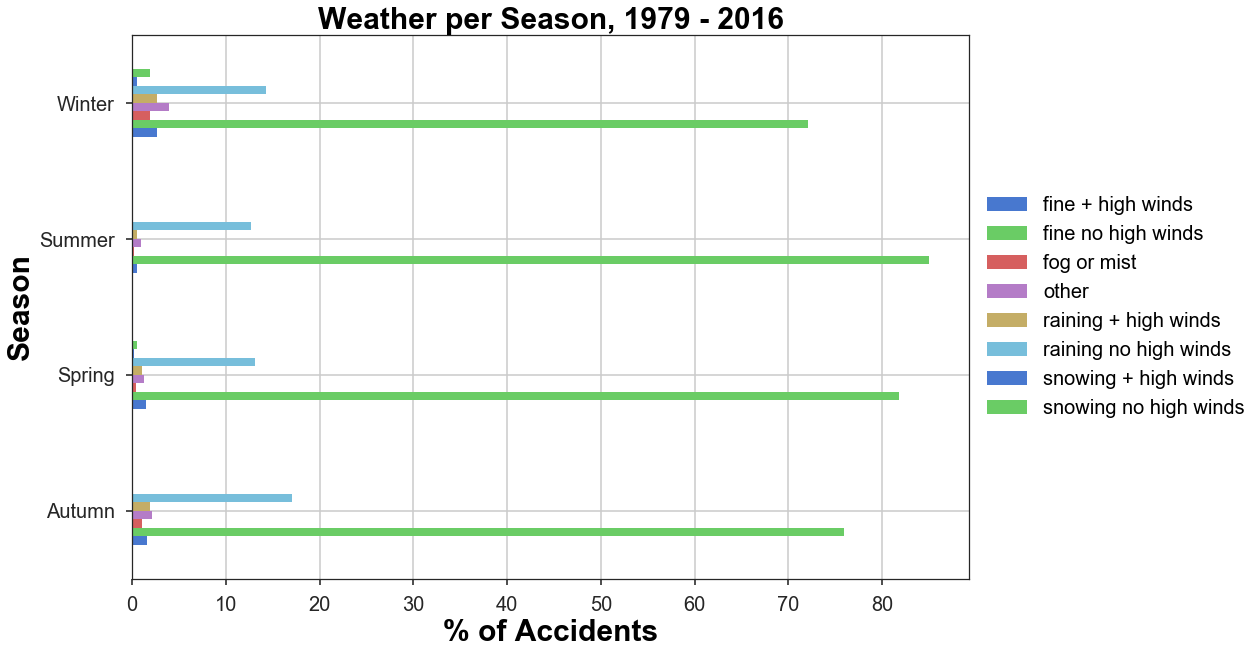

In [9]:
season_weather = norm_seasons_weather.plot(kind='barh', figsize=(15,10)) #plot bar chart

season_weather.set_xlabel("% of Accidents") #set x axis label 
season_weather.set_ylabel("Season") #set y axis label
plt.title('Weather per Season, 1979 - 2016', fontsize=30) #add title
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) #position the legend

From this graph, we can see clearly that most accidents occur during 'fine no high winds' weather conditions, with 'raining no high winds' in second. However, it is important to note that alike Ireland, the majority of the UK's weather consists of either rainy or 'fine' days. This would be an interesting area for future work, which may provide clearer insights into how/if weather conditions effect road accidents.

From the graph, it would appear that accidents during fine weather contribute to the highest percentage of accidents for the Summer season (~90%), than any other season. It is also important to note that Spring comes second to Summer in this sense, as over 80% of accidents in Spring also occur during fine weather. This is significant as before we saw that Spring ranked 4th on the list of seasons' combined percentages above, and as such we may have expected to see this lower in the list when compared to Summer.

Again, it is important to note that many people are on summer holidays during the summer, and when paired with fine weather, this contributes to more people on the road. As such, we do not believe that this graph contributes greatly to our research question.

## 4.
# Road Surface Conditions per Season

The graph below displays the road conditions which were present in reported road accidents, sorted by season.

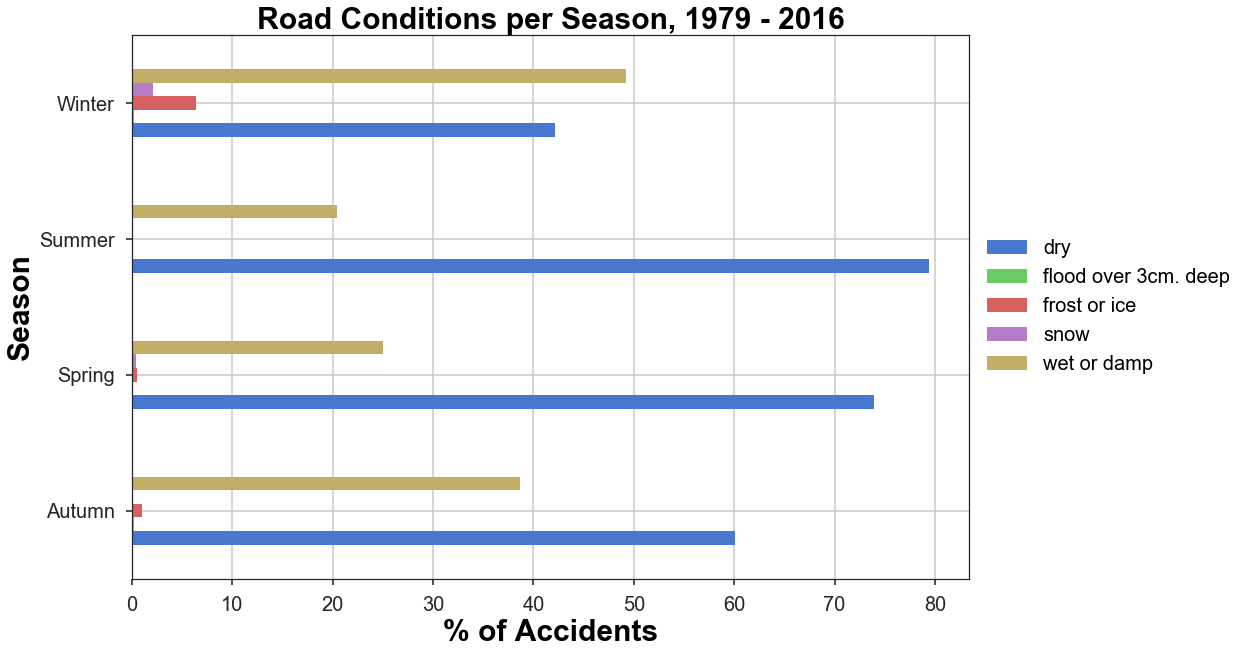

In [10]:
season_road_cond = norm_seasons_road_cond.plot(kind='barh', figsize=(15,10))

season_road_cond.set_xlabel("% of Accidents") #set x axis label 
season_road_cond.set_ylabel("Season") #set y axis label
plt.title('Road Conditions per Season, 1979 - 2016', fontsize=30) #add title
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) #position the legend

The graph above shows that road conditions are mostly either dry or wet/damp during road accidents, for each season. This is consistent with our weather conditions graph.

Again, normalising by the number of wet or dry days within the UK would be a great topic of future work, as it would help us to gain insight into how road conditions effect accidents.


## 5.
# Conclusion

## It is *not* safer to drive in the Summer than in the Winter

We came to this conclusion as we focused on the combined percentages for each season from our '% Accident Severities per Season, 1979 - 2016' graph, as we feel that accident severity gave us the truest reading of accidents in each season.

From this graph, we found:

* Winter had a combined percentage of 75.1% for all accident severities
* Summer has a combined percentage of 75.5%

So, although there are more people using the roads during the Summer, and thus more accidents, what is important to us in our findings is that accidents which occur in the Summer have more severe outcomes than accidents which occur in the Winter.

Upon exploring our data and analysing accident severity, weather conditions and road surface conditions, we have decided that it is "safer" to drive in the Winter than in the Summer.

It is important for us to note that although this data has been normalised, there is plenty of future work which could potentially be done on this research question. For example, as mentioned earlier;

* data could be normalised based on the total number of rainy days
* data could be normalised based on the total number of snowy days